# Forecasting individual concentraions and voltage

### 1) Importing libraries and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *


# from Data_sorting import Data_formatter_cycles

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_24984\1782324082.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/Data formatting/Dataset_scaled_denoised.xlsx')
data = data[data['I'] == 1.6]
X = data.iloc[1:,:9]
X = X.drop('I', axis = 1)
y = data.iloc[1:,11:]

In [3]:
print(y)

        S8_cur.1  S4_cur.1  S2_cur.1  S1_cur.1  Sp_cur.1   V_cur.1
1       2.914450 -2.959872 -0.929154 -0.232859 -0.925127  3.953539
2       2.914342 -2.959743 -0.929154 -0.232858 -0.925127  3.941755
3       2.914234 -2.959613 -0.929154 -0.232858 -0.925127  3.930271
4       2.914126 -2.959483 -0.929154 -0.232858 -0.925127  3.919073
5       2.914018 -2.959354 -0.929154 -0.232858 -0.925127  3.908146
...          ...       ...       ...       ...       ...       ...
144008 -0.715584 -0.685383  2.665497 -0.146795  2.664216 -0.871381
144009 -0.715584 -0.685426  2.665571 -0.146795  2.664290 -0.871385
144010 -0.715584 -0.685469  2.665645 -0.146796  2.664365 -0.871390
144011 -0.715584 -0.685512  2.665719 -0.146797  2.664439 -0.871394
144012 -0.715584 -0.685555  2.665794 -0.146798  2.664513 -0.871398

[144012 rows x 6 columns]


# S8 Prediction

In [4]:
X_S8 = X.copy()
X_S8 = X_S8.drop('S1_cur', axis = 1)
X_S8 = X_S8.drop('S2_cur', axis = 1)
X_S8 = X_S8.drop('Sp_cur', axis = 1)
# X_S8 = X_S8.drop('V_cur', axis = 1)
# X_S8 = X_S8.drop('iH', axis = 1)
   

y_S8 = y['S8_cur.1']

X_numpy_S8 = X_S8.values
y_numpy_S8 = y_S8.values

# Split the data into train and test sets
X_train_S8, X_test_S8, y_train_S8, y_test_S8 = train_test_split(X_numpy_S8, y_numpy_S8, test_size=0.2, random_state=42)

In [1]:
model8 = Sequential()
model8.add(Dense(10, activation='relu', input_dim = 5))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
model8.add(Dense(5,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model8.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model8.compile(optimizer='adam', loss='mean_squared_error')

model8.fit(X_train_S8, y_train_S8, epochs=20, batch_size=32)

NameError: name 'Sequential' is not defined

In [6]:
# Evaluate the model on the test set
mse = model8.evaluate(X_test_S8, y_test_S8)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 622us/step - loss: 1.1094e-06
Mean Squared Error on Test Set: 1.1093981129306485e-06


# S4 prediction

In [7]:
X_S4 = X.copy()
# X_S4 = X_S4.drop('iL', axis = 1)
# X_S4 = X_S4.drop('iH', axis = 1)
X_S4 = X_S4.drop('S8_cur', axis = 1)

y_S4 = y['S4_cur.1']

X_numpy_S4 = X_S4.values
y_numpy_S4 = y_S4.values

# Split the data into train and test sets
X_train_S4, X_test_S4, y_train_S4, y_test_S4 = train_test_split(X_numpy_S4, y_numpy_S4, test_size=0.2, random_state=42)

In [8]:
model4 = Sequential()
model4.add(Dense(7, activation='relu', input_dim = 7))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
model4.add(Dense(4,activation = 'relu'))
model4.add(Dense(2,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model4.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model4.compile(optimizer='adam', loss='mean_squared_error')

model4.fit(X_train_S4, y_train_S4, epochs=30, batch_size=32)

Epoch 1/30
3601/3601 [==============================] - 3s 807us/step - loss: 0.1744
Epoch 2/30
3601/3601 [==============================] - 3s 857us/step - loss: 0.0056
Epoch 3/30
3601/3601 [==============================] - 3s 848us/step - loss: 1.6259e-04
Epoch 4/30
3601/3601 [==============================] - 3s 829us/step - loss: 5.3552e-05
Epoch 5/30
3601/3601 [==============================] - 3s 827us/step - loss: 4.3345e-05
Epoch 6/30
3601/3601 [==============================] - 3s 818us/step - loss: 3.2838e-05
Epoch 7/30
3601/3601 [==============================] - 3s 816us/step - loss: 2.7094e-05
Epoch 8/30
3601/3601 [==============================] - 3s 836us/step - loss: 2.9852e-05
Epoch 9/30
3601/3601 [==============================] - 3s 816us/step - loss: 2.2959e-05
Epoch 10/30
3601/3601 [==============================] - 3s 808us/step - loss: 2.7712e-05
Epoch 11/30
3601/3601 [==============================] - 3s 819us/step - loss: 2.3153e-05
Epoch 12/30
3601/3601 [====

In [9]:
# Evaluate the model on the test set
mse = model4.evaluate(X_test_S4, y_test_S4)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 637us/step - loss: 1.9820e-05
Mean Squared Error on Test Set: 1.9819808585452847e-05


# S2 prediction

In [10]:
X_S2 = X.copy()
X_S2 = X_S2.drop('EH', axis = 1)
X_S2 = X_S2.drop('S8_cur', axis = 1)
X_S2 = X_S2.drop('V_cur', axis = 1)

y_S2 = y['S2_cur.1']

X_numpy_S2 = X_S2.values
y_numpy_S2 = y_S2.values

# Split the data into train and test sets
X_train_S2, X_test_S2, y_train_S2, y_test_S2 = train_test_split(X_numpy_S2, y_numpy_S2, test_size=0.2, random_state=42)

In [11]:
model2 = Sequential()
model2.add(Dense(5, activation='relu', input_dim = 5))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
model2.add(Dense(2,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

model2.fit(X_train_S2, y_train_S2, epochs=20, batch_size=32)

Epoch 1/20
3601/3601 [==============================] - 3s 739us/step - loss: 0.0462
Epoch 2/20
3601/3601 [==============================] - 3s 762us/step - loss: 3.4333e-04
Epoch 3/20
3601/3601 [==============================] - 3s 760us/step - loss: 2.6130e-04
Epoch 4/20
3601/3601 [==============================] - 3s 796us/step - loss: 9.9928e-05
Epoch 5/20
3601/3601 [==============================] - 3s 818us/step - loss: 3.9812e-05
Epoch 6/20
3601/3601 [==============================] - 3s 796us/step - loss: 2.0518e-05
Epoch 7/20
3601/3601 [==============================] - 3s 813us/step - loss: 1.3657e-05
Epoch 8/20
3601/3601 [==============================] - 3s 791us/step - loss: 7.9242e-06
Epoch 9/20
3601/3601 [==============================] - 3s 772us/step - loss: 6.1632e-06
Epoch 10/20
3601/3601 [==============================] - 3s 774us/step - loss: 5.3373e-06
Epoch 11/20
3601/3601 [==============================] - 3s 784us/step - loss: 2.3598e-06
Epoch 12/20
3601/3601 [

In [12]:
# Evaluate the model on the test set
mse = model2.evaluate(X_test_S2, y_test_S2)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 618us/step - loss: 3.6137e-07
Mean Squared Error on Test Set: 3.6137257097834663e-07


# S1 prediction

In [13]:
X_S1 = X.copy()
X_S1 = X_S1.drop('S8_cur', axis = 1)
# X_S1 = X_S1.drop('Sp_cur', axis = 1)
# X_S1 = X_S1.drop('S2_cur', axis = 1)


y_S1 = y['S1_cur.1']

X_numpy_S1 = X_S1.values
y_numpy_S1 = y_S1.values

# Split the data into train and test sets
X_train_S1, X_test_S1, y_train_S1, y_test_S1 = train_test_split(X_numpy_S1, y_numpy_S1, test_size=0.2, random_state=42)

In [14]:
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim = 7))
# model.add(Dense(6, activation='relu'))
# model1.add(Dense(12,activation = 'relu'))
model1.add(Dense(32,activation = 'relu'))
model1.add(Dense(16,activation = 'sigmoid'))
# model1.add(Dense(1,activation = 'tanh'))
model1.add(Dense(4,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

model1.fit(X_train_S1, y_train_S1, epochs=100, batch_size=32)

Epoch 1/100
3601/3601 [==============================] - 4s 952us/step - loss: 0.0792
Epoch 2/100
3601/3601 [==============================] - 3s 925us/step - loss: 5.8105e-04
Epoch 3/100
3601/3601 [==============================] - 3s 931us/step - loss: 4.3464e-04
Epoch 4/100
3601/3601 [==============================] - 3s 910us/step - loss: 4.6535e-04
Epoch 5/100
3601/3601 [==============================] - 3s 923us/step - loss: 4.3460e-04
Epoch 6/100
3601/3601 [==============================] - 3s 865us/step - loss: 4.3546e-04
Epoch 7/100
3601/3601 [==============================] - 3s 842us/step - loss: 3.2093e-04
Epoch 8/100
3601/3601 [==============================] - 3s 852us/step - loss: 4.2830e-04
Epoch 9/100
3601/3601 [==============================] - 3s 846us/step - loss: 4.7763e-04
Epoch 10/100
3601/3601 [==============================] - 3s 828us/step - loss: 2.3030e-04
Epoch 11/100
3601/3601 [==============================] - 3s 898us/step - loss: 1.6138e-04
Epoch 12/100

In [15]:
# Evaluate the model on the test set
mse = model1.evaluate(X_test_S1, y_test_S1)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 700us/step - loss: 8.5840e-05
Mean Squared Error on Test Set: 8.58398707350716e-05


# Sp prediction

In [16]:
X_Sp = X.copy()
X_Sp = X_Sp.drop('EH', axis = 1)
X_Sp = X_Sp.drop('EL', axis = 1)
X_Sp = X_Sp.drop('S8_cur', axis = 1)
X_Sp = X_Sp.drop('V_cur', axis = 1)

y_Sp = y['Sp_cur.1']

X_numpy_Sp = X_Sp.values
y_numpy_Sp = y_Sp.values

# Split the data into train and test sets
X_train_Sp, X_test_Sp, y_train_Sp, y_test_Sp = train_test_split(X_numpy_Sp, y_numpy_Sp, test_size=0.2, random_state=42)

In [17]:
modelp = Sequential()
modelp.add(Dense(8, activation='relu', input_dim = 4))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
modelp.add(Dense(4,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
modelp.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
modelp.compile(optimizer='adam', loss='mean_squared_error')

modelp.fit(X_train_Sp, y_train_Sp, epochs=20, batch_size=32)

Epoch 1/20


3601/3601 [==============================] - 3s 833us/step - loss: 0.0314
Epoch 2/20
3601/3601 [==============================] - 3s 815us/step - loss: 6.5223e-05
Epoch 3/20
3601/3601 [==============================] - 3s 769us/step - loss: 1.1885e-05
Epoch 4/20
3601/3601 [==============================] - 3s 799us/step - loss: 5.9993e-06
Epoch 5/20
3601/3601 [==============================] - 3s 760us/step - loss: 3.7422e-06
Epoch 6/20
3601/3601 [==============================] - 3s 744us/step - loss: 4.7239e-06
Epoch 7/20
3601/3601 [==============================] - 3s 750us/step - loss: 4.3596e-06
Epoch 8/20
3601/3601 [==============================] - 3s 739us/step - loss: 5.1120e-06
Epoch 9/20
3601/3601 [==============================] - 3s 722us/step - loss: 2.5978e-06
Epoch 10/20
3601/3601 [==============================] - 3s 732us/step - loss: 4.6375e-06
Epoch 11/20
3601/3601 [==============================] - 3s 722us/step - loss: 5.2333e-06
Epoch 12/20
3601/3601 [===========

In [18]:
# Evaluate the model on the test set
mse = modelp.evaluate(X_test_Sp, y_test_Sp)
print(f"Mean Squared Error on Test Set: {mse}")

153/901 [====>.........................] - ETA: 0s - loss: 8.7583e-08 

901/901 [==============================] - 1s 726us/step - loss: 8.4549e-08
Mean Squared Error on Test Set: 8.454921385236958e-08


# Voltage prediction

In [19]:
X_V = X.copy()
# X_S4 = X_S4.drop('iL', axis = 1)
# X_S4 = X_S4.drop('iH', axis = 1)
X_V = X_V.drop('S2_cur', axis = 1)
X_V = X_V.drop('S1_cur', axis = 1)
X_V = X_V.drop('Sp_cur', axis = 1)


y_V = y['V_cur.1']

X_numpy_V = X_V.values
y_numpy_V = y_V.values

# Split the data into train and test sets
X_train_V, X_test_V, y_train_V, y_test_V = train_test_split(X_numpy_V, y_numpy_V, test_size=0.2, random_state=42)

In [20]:
modelV = Sequential()
modelV.add(Dense(10, activation='relu', input_dim = 5))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
# model4.add(Dense(4,activation = 'relu'))
modelV.add(Dense(5,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
modelV.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
modelV.compile(optimizer='adam', loss='mean_squared_error')

modelV.fit(X_train_V, y_train_V, epochs=20, batch_size=32)

Epoch 1/20


3601/3601 [==============================] - 3s 790us/step - loss: 0.0431
Epoch 2/20
3601/3601 [==============================] - 3s 771us/step - loss: 6.1038e-06
Epoch 3/20
3601/3601 [==============================] - 3s 771us/step - loss: 4.1376e-06
Epoch 4/20
3601/3601 [==============================] - 3s 763us/step - loss: 3.7855e-06
Epoch 5/20
3601/3601 [==============================] - 3s 780us/step - loss: 2.0634e-06
Epoch 6/20
3601/3601 [==============================] - 3s 743us/step - loss: 1.7800e-06
Epoch 7/20
3601/3601 [==============================] - 3s 737us/step - loss: 1.9848e-06
Epoch 8/20
3601/3601 [==============================] - 3s 747us/step - loss: 1.7135e-06
Epoch 9/20
3601/3601 [==============================] - 3s 744us/step - loss: 1.4464e-06
Epoch 10/20
3601/3601 [==============================] - 3s 741us/step - loss: 1.5020e-06
Epoch 11/20
3601/3601 [==============================] - 3s 747us/step - loss: 1.6091e-06
Epoch 12/20
3601/3601 [===========

In [21]:
# Evaluate the model on the test set
mse = modelV.evaluate(X_test_V, y_test_V)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 602us/step - loss: 3.5256e-06
Mean Squared Error on Test Set: 3.5256316550658084e-06


# Important functions

In [22]:
def next_prediction(prediction, scales):

    array = []

    EH,EL = param_finder_Nernst(prediction,scale)

    EH = (EH - scales.iloc[0,6])/scales.iloc[1,6]

    EL = (EL - scales.iloc[0,7])/scales.iloc[1,7]


    array.append(prediction[0][0])
    array.append(prediction[0][1])
    array.append(prediction[0][2])
    array.append(prediction[0][3])
    array.append(prediction[0][5])
    array.append(prediction[0][4])
    array.append(EH)
    array.append(EL)

    array = np.array([array])

    return array 




def param_finder_Nernst(prediction, scales):
    # Defined in the code
    EH0 = 2.35
    EL0 = 2.195
    iH0 = 10
    iL0 = 5
    R = 8.3145
    T = 298
    F = 96490
    fh = 0.7296
    fl = 0.06654
    ar = 0.96

    # Unscale the concentration values to find S8 - Sp
    S8 = (prediction[0][0] * scales.iloc[1,0]) + scales.iloc[0,0]
    S4 = (prediction[0][1] * scales.iloc[1,1]) + scales.iloc[0,1]
    S2 = (prediction[0][2] * scales.iloc[1,2]) + scales.iloc[0,2]
    S1 = (prediction[0][3] * scales.iloc[1,3]) + scales.iloc[0,3]
    Sp = (prediction[0][4] * scales.iloc[1,5]) + scales.iloc[0,5]

    # S8 = (prediction[0][0])
    # S4 = (prediction[0][1])
    # S2 = (prediction[0][2])
    # S1 = (prediction[0][3])
    # Sp = (prediction[0][4])

    # Unscaled EH, EL

    EH = EH0 + (((R*T)/(4*F))*np.log(fh*(S8/(S4**2))))
    EL = EL0 + (((R*T)/(4*F))*np.log(fl*(S4/((S1**2)*S2))))

    return EH,EL

In [23]:
X_numpy = X.values
y_numpy = y.values

In [24]:

def mass_prediction(input):
    S8_features = ['S8_cur', 'S4_cur', 'V_cur', 'EH', 'EL']
    S4_features = ['S4_cur','S2_cur', 'S1_cur', 'V_cur', 'Sp_cur','EH', 'EL']
    S2_features = ['S4_cur','S2_cur', 'S1_cur', 'Sp_cur', 'EL']
    S1_features = ['S4_cur','S2_cur', 'S1_cur', 'V_cur', 'Sp_cur','EH', 'EL']
    Sp_features = ['S4_cur','S2_cur', 'S1_cur', 'Sp_cur']
    V_features = ['S8_cur', 'S4_cur', 'V_cur', 'EH', 'EL']

    # Reshape the input to ensure it's 2D
    input_2d = input.reshape(1, -1)  # Reshape to 1 row, many columns

    input_df = pd.DataFrame(input_2d, columns = ['S8_cur', 'S4_cur','S2_cur', 'S1_cur', 'V_cur', 'Sp_cur','EH', 'EL'])

    S8_input = np.array(input_df[S8_features])
    S4_input = np.array(input_df[S4_features])
    S2_input = np.array(input_df[S2_features])
    S1_input = np.array(input_df[S1_features])
    Sp_input = np.array(input_df[Sp_features])
    V_input = np.array(input_df[V_features])

    S8 = model8.predict(S8_input)[0][0]
    S4 = model4.predict(S4_input)[0][0]
    S2 = model2.predict(S2_input)[0][0]
    S1 = model1.predict(S1_input)[0][0]
    Sp = modelp.predict(Sp_input)[0][0]
    V = modelV.predict(V_input)[0][0]

    array = [[S8,S4,S2,S1,Sp,V]]

    return array


# Multiple iterations

[[ 2.75583962 -2.76949624 -0.92914884 -0.23244107  2.28260561 -0.92512734
   2.26101299  2.32763776]]
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 18ms/step


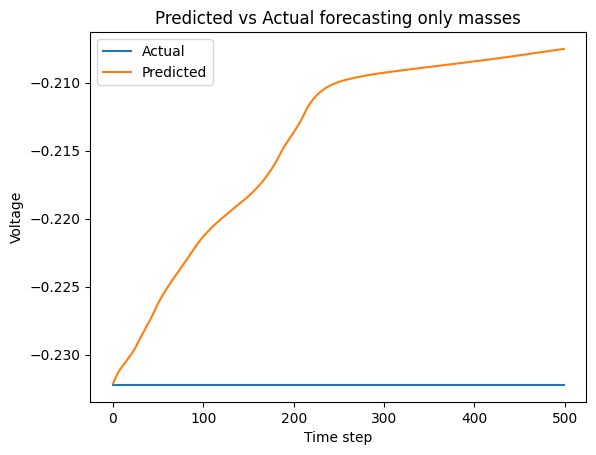

In [31]:
no_predictions = 500
start = 1500

input = np.array([X_numpy[start]])

print(input)

output = []

scale = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/Data formatting/Scales_denoised.xlsx')

for i in range(no_predictions):
    
    next_prediction_array = mass_prediction(input)

    input = next_prediction(next_prediction_array, scale)

    # print(input)

    output.append(input)



plot_actual = []

for j in range(no_predictions):
    plot_actual.append(X_numpy[no_predictions + start][3])

plt.plot(plot_actual, label = 'Actual')



mass = []
for i in range(len(output)):
    mass.append(output[i][0][3])

plt.plot(mass, label = 'Predicted')
plt.xlabel('Time step')
plt.ylabel('Voltage')
plt.title('Predicted vs Actual forecasting only masses')
plt.legend()

plt.show()